In [1]:
import matplotlib.pyplot as plt
from Pde_solver import Solver
from Inference import Inference

In [43]:
## Initiate PDE solver class 
solv = Solver(n_save_frames=20, n_time_points=4000, model='gray-scott')

In [44]:
## Set F & k parameters and solve
## spots: F=0.035, k=0.065
## maze-like: F=0.035, k=0.06

tmp = solv.solve(parameters=[0.035, 0.060])  # parameters = [F, k]

  0%|          | 4/4000 [00:00<01:50, 36.28it/s]

Solving gray-scott model in 4000 time steps.




100%|██████████| 4000/4000 [00:39<00:00, 101.76it/s]


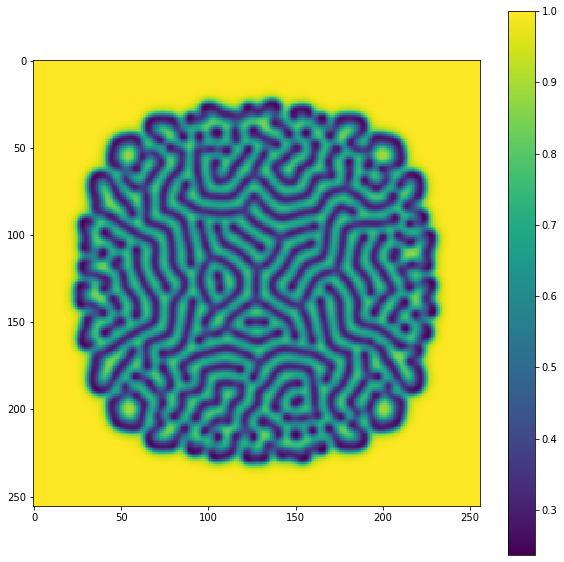

In [45]:
## Plot result
plt.imshow(solv.u_mat[:, :])
plt.colorbar()

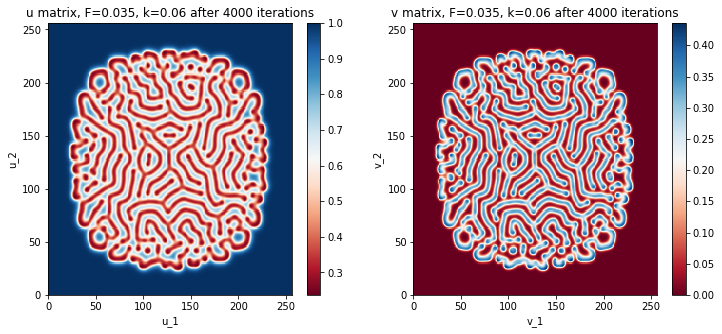

In [46]:
## Or use plotting function from class
solv.plot2d()

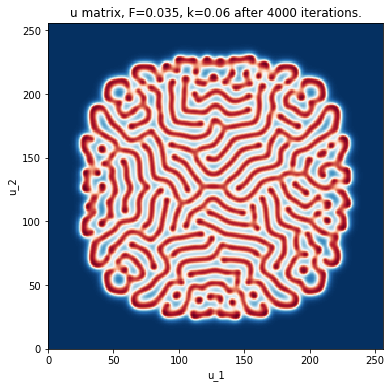

In [18]:
## Save animation to disk
plt.rcParams['figure.figsize'] = (6, 6)
solv.animation()

In [29]:
len(solv.save_times)
solv.save_times
solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y).shape

(20, 65536)

In [36]:
import pints
## Initiate inference class:
inference = Inference(solv, solv.save_times, solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y))
problem = pints.MultiOutputProblem(solv, solv.save_times, solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y))

In [49]:
score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0.01, 0.01], [0.7, 1.0])
x0 = [0.5, 0.5]
found_parameters, found_value = pints.optimise(score, x0, boundaries=boundaries, method=pints.SNES)
print(found_parameters)

Minimising error measure
Using Seperable Natural Evolution Strategy (SNES)
Running in sequential mode.
Population size: 6

----------------------------------------
Unexpected termination.
Current best score: inf
Current best position:
 5.00000000000000000e-01
 5.00000000000000000e-01
----------------------------------------


NotImplementedError: 